In [1]:
import numpy as np
from scipy.interpolate import CubicSpline

from scipy.sparse import coo_matrix

import matplotlib.pyplot as plt
from numpy import cos, sin, log
from math import pi, exp

import random

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def f(x, y):
    return x**2*y-10*x**2+26*x*y-260*x+y**3-30*y**2+460*y-2599

def f(a):
    x, y=a
    return x**2*y-10*x**2+26*x*y-260*x+y**3-30*y**2+460*y-2599

# Метод покоординатного спуска

In [3]:
def p(k):
    if k%2==0:
        return np.array([1, 0])
    else:
        return np.array([0, 1])


Ал-м Свена

In [4]:
def interval(x, i, h = 1):
    x_new=x[:]
    temp_plus=x[:]
    temp_minus=x[:]
    temp_plus[i]+=h
    temp_minus[i]-=h
    while(True):
        if f(temp_minus) >= f(x) >= f(temp_plus):
            x_new[i]+=h/2
        if f(temp_minus) < f(x) < f(temp_plus):
            x_new[i]-=h/2
        return x_new[i]

In [5]:
def golden_ratio(x, i, x_s, y_s):
    """
    if i==0:
        a=-9.9
        b=-16
    else:
        a=7.5
        b=10
    
    a=-20
    b=17
    """
    h=1
    dot=interval(x, i, h)
    a=dot-h
    b=dot+h
    q=(1+5**0.5)/2
    k=0
    while abs((b-a)/2)>0.001:
        k+=1
        x1=b-(b-a)/q
        x2=a+(b-a)/q
        temp1=x[:]
        temp2=x[:]
        temp1[i]=x1
        temp2[i]=x2
        if f(temp1)>f(temp2):
            b=x2
        elif f(temp1)<f(temp2):
            a=x1
        else:
            a=x1
            b=x2
        #print(x, a, b, x1, x2, i)
    temp=x[:]
    #print(k)
    temp[i]=(a+b)/2
    x_s+=[temp[0]]
    y_s+=[temp[1]]

    return (a+b)/2


In [6]:
def krit(x, x_new):
    eps=0.0001
    return ((x[0]-x_new[0])**2+(x[1]-x_new[1])**2)**0.5>eps
    return abs(f(x)-f(x_new))>eps
    

In [7]:
x=[10, -11]
k=0
x_s=[x[0]]
y_s=[x[1]]
while k==0 or kriteriy:
    k+=1
    x_new=x[:]
    for i in range(0, 2):
        x_new[i]=golden_ratio(x_new, i, x_s, y_s)
    kriteriy=krit(x, x_new)
    x=x_new
    #print(x)
print(k)
print(x)
x_answer=x

48
[-13.000264427845401, 8.267948672660761]


[-13.000030528419149, 8.267973896398265]

[10, 9.500733137435859, 9.500733137435859, 9.001466274871717, 9.001466274871717, 8.502199412307576, 8.502199412307576, 8.002932549743434, 8.002932549743434, 7.503665687179291, 7.503665687179291, 7.004398824615148, 7.004398824615148, 6.505131962051005, 6.505131962051005, 6.005865099486861, 6.005865099486861, 5.506598236922718, 5.506598236922718, 5.007331374358575, 5.007331374358575, 4.508064511794432, 4.508064511794432, 4.008797649230289, 4.008797649230289, 3.5095307866661463, 3.5095307866661463, 3.010263924102004, 3.010263924102004, 2.5109970615378616, 2.5109970615378616, 2.0117301989737193, 2.0117301989737193, 1.5124633364095765, 1.5124633364095765, 1.0131964738454338, 1.0131964738454338, 0.5139296112812912, 0.5139296112812912, 0.014662748717148625, 0.014662748717148625, -0.4846041138469939, -0.4846041138469939, -0.9838709764111364, -0.9838709764111364, -1.4831378389752792, -1.4831378389752792, -1.982404701539422, -1.982404701539422, -2.4816715641035643, -2.4816715641035643, -2.980938

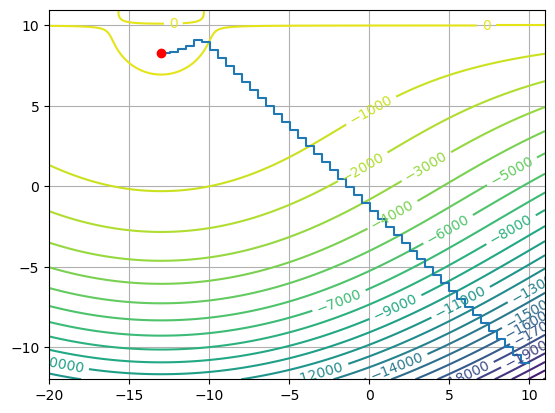

In [8]:
step = 0.02
lim=12
x1 = np.arange(-20, 11, step)
x2 = np.arange(-12, 11, step)
x, y = np.meshgrid(x1, x2)
Z = x**2*y-10*x**2+26*x*y-260*x+y**3-30*y**2+460*y-2599
CS = plt.contour(x,y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x_s,y_s)
#plt.plot([10, 0], [-11, 0], 'o')
print(x_s,y_s)
plt.plot(x_answer[0], x_answer[1], "ro")

# Ал-м Хука-Дживса

In [9]:
def temp(x, i, h):
    temp=x.copy()
    temp[i]+=h
    return temp

In [10]:
def norm(x):
    s=0
    for elem in x:
        s+=elem**2
    return s**0.5

In [11]:
x=np.array([10.0, -11.0])
k=0

x_s=[x[0]]
y_s=[x[1]]

h=[0.35, 0.35]
while True:
    k+=1
    x_new=x[:]
    for i in range(2):
        """
        temp_p, temp_m= x.copy(), x.copy()
        temp_p[i]+=h[i]
        temp_m[i]-=h[i]
        """
        temp_p, temp_m=temp(x_new, i, h[i]), temp(x_new, i, -h[i])
        #print(temp_p, temp_m, f(temp_p), f(x_new), f(temp_m))
        if f(temp_p)>f(x_new) or f(temp_m)>f(x_new):
            if f(temp_p)>f(temp_m):
                x_new=temp_p
            else:
                x_new=temp_m
        else:
            h[i]/=2
            #print(x_new,"!!!!!!!!")
            #input()
        
    #print(x_new, h)    
    if h[0]<0.00001 and h[1]<0.00001 :
        break
    if abs(f(x_new)-f(x))<0.0001:#norm(x-x_new)<0.001:
        break
    x_s+=[x_new[0]]
    y_s+=[x_new[1]] 
    #print(len(x_s), k)
    x=x+2*(x_new-x)
    #print(x, x_new)
    x_s+=[x[0]]
    y_s+=[x[1]] 
    #kriteriy=krit(x, x_new)

    
    #print(x_new)
    #x=x_new
    #print(x)
print(k)
print(x)
[print(elem) for elem in x]
x_answer2=x
#[print(x_s[i], y_s[i]) for i in range(len(x_s))]

34
[-13.1    8.25]
-13.099999999999984
8.24999999999999


34


<a list of 21 text.Text objects>

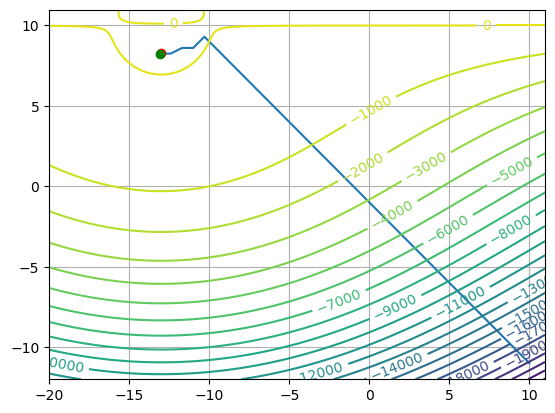

In [12]:
print(k)
plt.plot(x_s, y_s)
plt.plot(x_answer[0], x_answer[1], "ro")
plt.plot(x_answer2[0], x_answer2[1], "go")

step = 0.02
lim=12
x1 = np.arange(-20, 11, step)
x2 = np.arange(-12, 11, step)
x, y = np.meshgrid(x1, x2)
Z = x**2*y-10*x**2+26*x*y-260*x+y**3-30*y**2+460*y-2599
CS = plt.contour(x,y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)

#plt.plot([10, 0], [-11, 0], 'o')

#[print(x_s[i], y_s[i]) for i in range(len(x_s))]

# Метод случаек

In [13]:
def limits_of_uniform(x, inter, r):
    r=random.uniform(-r, r)
    if x+r<inter[0]:
        return x-r
    if x+r>inter[1]:
        return x-r
    return x+r
    

-18941.774688184047
-17671.170262395477
-16444.536606442533
-15265.868097729406
-14143.608294982703
-13080.029175518643
-12100.808455203198
-11174.88935991258
-10300.211392582849
-9459.579416512932
-8644.63861960124
-7916.391530602258
-7221.307836472562
-6560.073278929739
-5953.778795942628
-5363.102881275236
-4810.959440475306
-4293.576124758046
-3819.5032451388124
-3389.561318022284
-3005.3826029571537
-2636.138553957724
-2291.5893069354634
-1987.3267964131642
-1708.6092458711087
-1462.7190094281013
-1236.9199811011767
-1039.7209756166392
-861.7209347154301
-701.5346788033225
-566.5606712673525
-449.4742904899522
-348.3311288664454
-261.4563287190831
-189.88734935316052
-135.72269766717955
-91.66403777866708
-57.20665470268159
-31.406767060288075
-14.844584160698105
-4.550673719706538
0.5652246987588114
2.5883337545874383
5.117594630545682
7.526326594241709
9.553641978937776
10.814900059016509
11.370927744636901
11.39208135038507
11.39208135038507
50 [-12.990704234578176, 8.271728229

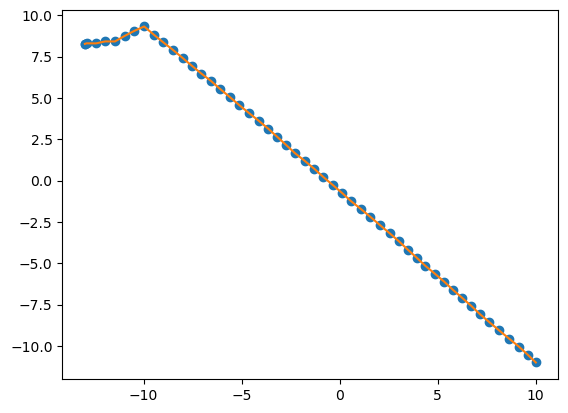

In [14]:
x=[10, -11]
r=0.5
max_delta=55
x_s=[10]
y_s=[-11]
k=0
iter=0
x1_interval=[-20, 11]
x2_interval=[-12, 11]
diff=10000
while diff>0.001 and iter<100:
    iter+=1
    x_max=x.copy()
    for i in range(1000):
        x1_rand=limits_of_uniform(x[0], x1_interval, r)
        x2_rand=limits_of_uniform(x[1], x2_interval, r)
        x_new=[x1_rand, x2_rand]
        if f(x_new)>f(x_max):
            x_max=x_new
    diff=abs(f(x)-f(x_max))
    x=x_max
    x_s+=[x[0]]
    y_s+=[x[1]]
    print(f(x))

print(iter, x)
plt.plot(x_s, y_s, 'o')
plt.plot(x_s, y_s)

[10, 9.587963227285595, 9.130575470419918, 8.631706678501933, 8.131987006162928, 7.638377004549268, 7.149120875943699, 6.710553242111177, 6.249239746443983, 5.7844216746145465, 5.333903454235248, 4.844622418979308, 4.370126163778081, 3.9272214235311287, 3.4677928588265408, 3.0323146858908054, 2.551614811182214, 2.060836939496401, 1.5689275211439284, 1.0760024602862348, 0.5768765058631307, 0.13623003576388026, -0.3436508776611845, -0.8382173465171261, -1.295668510711556, -1.7849494898345442, -2.278942918772145, -2.7327272745459448, -3.1814089534761507, -3.6394609551218795, -4.133813872125584, -4.626864979425135, -5.112334035578418, -5.590951521494152, -6.084857204213568, -6.565994339773081, -7.0531935413994296, -7.529768095001391, -8.008550066243902, -8.507869810983594, -8.996498396842252, -9.480397687158849, -9.969179885170513, -10.46489712632449, -10.964514086537076, -11.4600928801025, -11.956029373920884, -12.41988855458788, -12.907426327282408, -12.990704234578176, -12.9907042345781

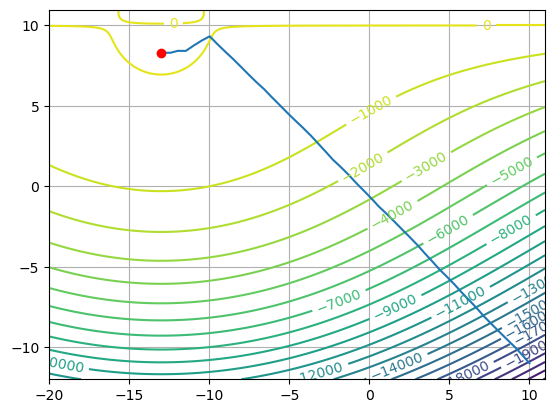

In [15]:
step = 0.02
lim=12
x1 = np.arange(-20, 11, step)
x2 = np.arange(-12, 11, step)
x, y = np.meshgrid(x1, x2)
Z = x**2*y-10*x**2+26*x*y-260*x+y**3-30*y**2+460*y-2599
CS = plt.contour(x,y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x_s,y_s)
#plt.plot([10, 0], [-11, 0], 'o')
print(x_s,y_s)
plt.plot(x_answer[0], x_answer[1], "ro")